In [1]:
pip install prophet pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import tqdm as notebook_tqdm

In [4]:
# Loading the IBM dataset
# Assume you have a CSV file with data containing 'Date' and 'Close' columns
df = pd.read_csv('IBM2017.csv')

In [5]:
# Converting 'Date' column to datetime format and renaming columns for Prophet
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

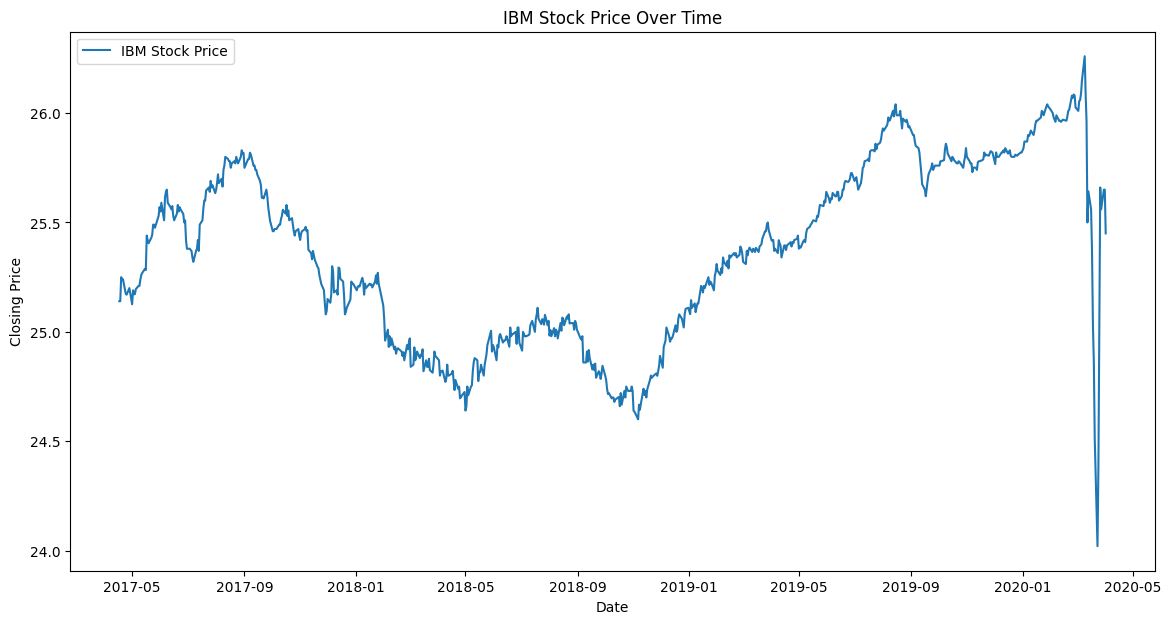

In [7]:
 #Plotting the original data
plt.figure(figsize=(14,7))
plt.plot(df['ds'], df['y'], label='IBM Stock Price')
plt.title('IBM Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [8]:
# Creating and fitting the Prophet model
model = Prophet()
model.fit(df)

14:26:18 - cmdstanpy - INFO - Chain [1] start processing
14:26:18 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Making predictions for the future
future = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days
forecast = model.predict(future)

/usr/local/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


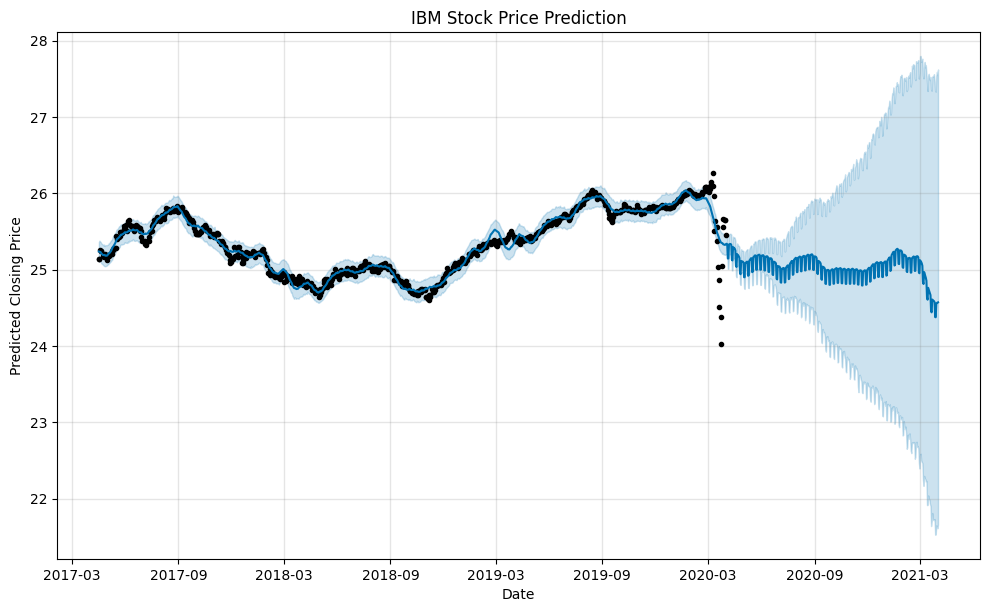

In [10]:
# Plotting the forecasted data
model.plot(forecast)
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Predicted Closing Price')
plt.show()

/usr/local/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on t

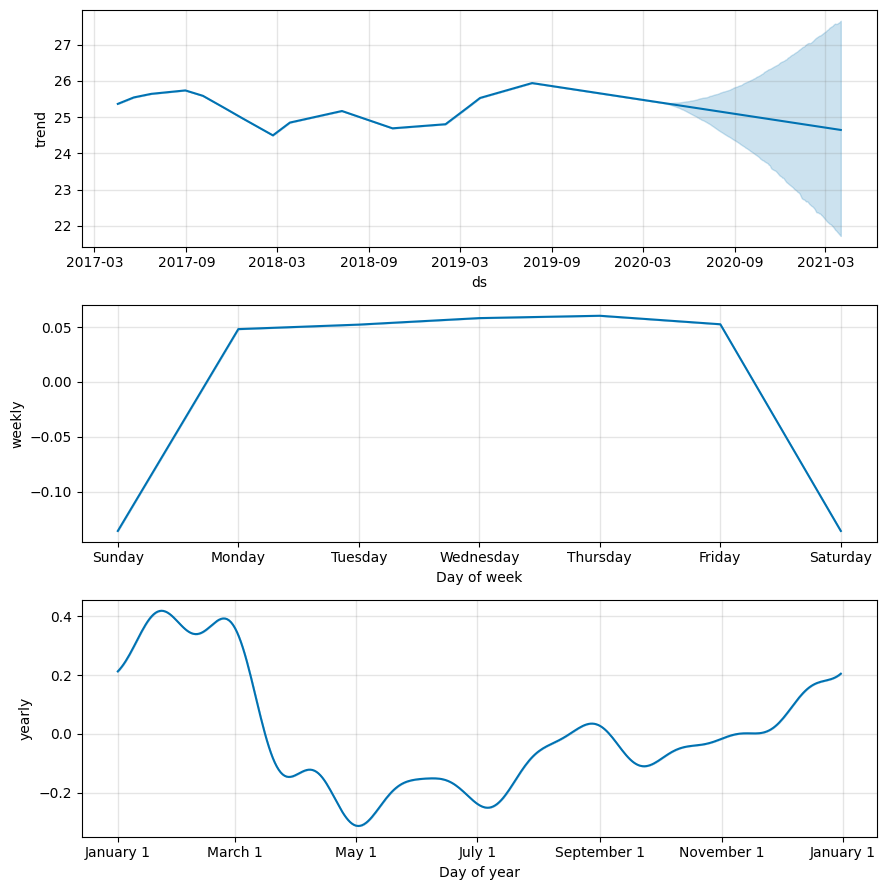

In [11]:
# Plotting forecast components
model.plot_components(forecast)
plt.show()

Explanation:

    Data Preparation: The IBM dataset is loaded, and the 'Date' and 'Close' columns are renamed to 'ds' (datetime) and 'y' (value) as required by Prophet.

    Model Fitting: A Prophet model is created and fitted to the historical data.

    Forecasting: The model predicts future stock prices for the next 365 days. You can change the periods argument to predict for a different duration.

    Visualization: The code generates two plots:
        The first plot shows the actual and predicted stock prices over time.
        The second plot shows the forecast components, such as trend and seasonality.

Notes:

    If you want to forecast a shorter or longer period, adjust the periods parameter in the make_future_dataframe method.
    The code also includes a plot of the data components, which breaks down the forecast into trend and seasonal effects.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>